In [2]:
#import the following functions
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

In [4]:
'loading data'
data = pd.read_csv('shot_logs.csv')

(128069, 21)


In [5]:
'removing unnecessary columns: GAME ID, Matchup'
data = data.drop(['GAME_ID','MATCHUP'], axis = 1)

(128069, 19)


In [4]:
'data size'
print('Data Size: ', data.shape)

Data Size:  (128069, 19)


In [6]:
'''
remove nan data'
since >95% of the data is fully available, and only <5% have no available entries, I will drop entries with missing
data
'''
data = data.dropna()

(122502, 19)


In [6]:
def sort_data(players, desc):
    'sort data of players from lowest to highest'
    data = {}
    sorted_data = {}
    for player in players:
        data[player] = mean_clutch[player][desc]
    for i in sorted (data.values()):
        for p in players:
            if data[p] == i:
                sorted_data[p] = i
                break
    return sorted_data

In [7]:
'Data Exploration'
lab = 12
tit = 12


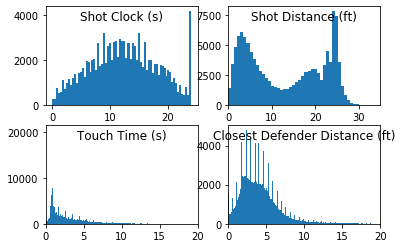

In [8]:
ax = plt.figure(1)
plt.rcParams['figure.figsize'] = (20, 20)

plt.subplot(2,2,1)
plt.title('Shot Clock (s)', fontsize=tit, y=0.80)
plt.hist(data['SHOT_CLOCK'], bins='auto')

plt.subplot(2,2,2)
plt.title('Shot Distance (ft)', fontsize=tit, y=0.8)
plt.hist(data['SHOT_DIST'], bins='auto')
plt.xlim([0,35])

plt.subplot(2,2,3)
plt.title('Touch Time (s)', y=0.8)
plt.hist(data['TOUCH_TIME'], bins='auto')
plt.xlim([0,20])

plt.subplot(2,2,4)
plt.title('Closest Defender Distance (ft)', y=0.8)
plt.hist(data['CLOSE_DEF_DIST'], bins='auto')
plt.xlim([0, 20])
plt.show()

In [12]:
'Clutch players'
clutch_data = data[data['SHOT_CLOCK'] > 20.0]
print('Players with most shots ...')
print(clutch_data['player_name'].value_counts()[0:10])
clutch_players = ['andre drummond','deandre jordan','goran dragic','russell westbrook','lebron james',
                  'eric bledsoe','enes kanter','stephen curry']
y_values = []
for i in clutch_data['player_name'].value_counts()[0:8]:
    y_values.append(i)

Players with most shots ...
andre drummond       228
deandre jordan       166
goran dragic         143
russell westbrook    132
lebron james         128
eric bledsoe         123
enes kanter          110
stephen curry        109
jimmy butler         107
greg monroe          107
Name: player_name, dtype: int64


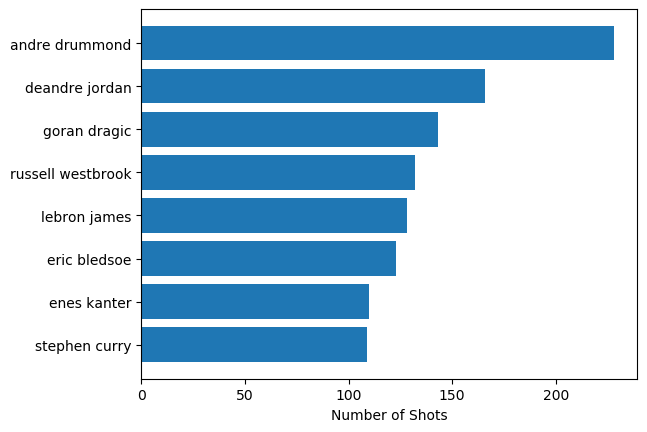

In [14]:
'Second Figure'
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(clutch_players, y_values)
plt.gca().invert_yaxis()
plt.xlabel('Number of Shots')
plt.show()

In [15]:
'data frame for each clutch player in a dictionary'
players = {}
for player in clutch_players:
    players[player] = clutch_data[clutch_data['player_name'] == player]

In [16]:
'Mean data for each clutch player'
mean_clutch = {}
for player in players:
    mean_clutch[player] = players[player].mean()

In [18]:
'choices I made for descriptors'
descriptors = ['SHOT_DIST','DRIBBLES','TOUCH_TIME','PTS']

In [19]:
'Data Analysis'
for d in descriptors:
    print('----'+d+'----')
    for player in players:
        print(player, mean_clutch[player][d])

----SHOT_DIST----
andre drummond 3.184210526315789
deandre jordan 3.572891566265061
goran dragic 5.019580419580417
russell westbrook 8.999242424242423
lebron james 8.8265625
eric bledsoe 8.257723577235774
enes kanter 3.0763636363636375
stephen curry 16.324770642201834
----DRIBBLES----
andre drummond 0.20175438596491227
deandre jordan 0.16265060240963855
goran dragic 1.5874125874125875
russell westbrook 1.9621212121212122
lebron james 1.25
eric bledsoe 1.8130081300813008
enes kanter 0.16363636363636364
stephen curry 1.5504587155963303
----TOUCH_TIME----
andre drummond 0.8083333333333328
deandre jordan 0.8012048192771083
goran dragic 2.0853146853146862
russell westbrook 2.2977272727272715
lebron james 1.9531250000000002
eric bledsoe 2.4048780487804864
enes kanter 1.1318181818181816
stephen curry 2.202752293577982
----PTS----
andre drummond 1.105263157894737
deandre jordan 1.3373493975903614
goran dragic 1.4055944055944056
russell westbrook 1.1818181818181819
lebron james 1.484375
eric bl

In [20]:
'shots before 20 seconds'
non_clutch_data = data[data['SHOT_CLOCK'] < 20.0]

players, mean_non_clutch = {},{}
for player in clutch_players:
    players[player] = non_clutch_data[non_clutch_data['player_name'] == player]
    mean_non_clutch[player] = players[player].mean()
for d in descriptors:
    print('----'+d+'----')
    for player in players:
        print(player, mean_non_clutch[player][d])

----SHOT_DIST----
andre drummond 5.114251781472684
deandre jordan 3.294470046082949
goran dragic 13.562564991334495
russell westbrook 13.232916145181457
lebron james 14.607626076260763
eric bledsoe 13.589836065573754
enes kanter 9.65828571428571
stephen curry 17.33255528255528
----DRIBBLES----
andre drummond 0.7909738717339667
deandre jordan 0.16129032258064516
goran dragic 3.147313691507799
russell westbrook 5.551939924906133
lebron james 5.152521525215252
eric bledsoe 5.036065573770492
enes kanter 0.5085714285714286
stephen curry 3.925061425061425
----TOUCH_TIME----
andre drummond 1.942755344418054
deandre jordan 0.7700460829493075
goran dragic 3.511785095320623
russell westbrook 5.670087609511883
lebron james 6.280319803198027
eric bledsoe 5.263934426229513
enes kanter 1.7051428571428549
stephen curry 4.078624078624076
----PTS----
andre drummond 0.9548693586698337
deandre jordan 1.5115207373271888
goran dragic 1.0311958405545927
russell westbrook 0.886107634543179
lebron james 1.008